# <center> STAT 301 Project: Proposal </center>

**Group Members (Group 1)** Fiona Wang, Jack Fan, William Suryawidjaja, Ria Ji

## 1. Introduction

Life expectancy is the estimate of the average number of additional years a person is expected to live. Your life expectancy can be affected by various factors such as genetics as well as your lifestyle, which may reduce or increase your life expectancy over time (Passarino, 2016).

Insurance companies typically charge premiums for customers who are likely to pass away shortly after purchasing their policy. This is because they are undertaking a greater risk of paying the entire policy before the customer has invested more than the policy's worth. Therefore, life insurance companies use one's life expectancy to set the pricing of life insurance policies (Social Security, 2019). If there is a huge gap between your age and your life expectancy, there is a lower risk for the insurance company and the policy will be set at a cheaper price.

As such, the motivation behind this group project is to determine the factors that best predicts one's life expectancy. Formally, we are addressing the question: "What are the variables that best predict one's life expectancy?"

To answer this question, we will be using the Life Expectancy Dataset from Kaggle (https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who). The dataset consists of 2938 rows of Life Expectancy data collected from the World Health Organization (WHO) from 2000 to 2015 across 193 countries. Each row has 20 explanatory variable which can be grouped into several broad categories: Immunization related factors, Mortality factors, Economical factors and Social factors(Kumar., 2017).

## 2. Preliminary Results

### 2.1 Data Wrangling

In [3]:
# install.packages("package_name")
# run this line of code to install the packages if they are not installed on your machine
#install.packages("hardhat")
#install.packages("tidymodels")

# Load required packages
library("GGally")
library("ggplot2")
library("janitor")
library("plyr")
library("tidyverse")
library("reshape")
library("leaps")
#library("tidymodels")

We'll start by importing the dataset, loading it into a dataframe and inspecting the results. The original dataset can be found [here](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who).

In [4]:
le = read_csv("https://shorturl.at/FV478")

Rows: 2938 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Country, Status
dbl (20): Year, Life expectancy, Adult Mortality, infant deaths, Alcohol, pe...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
# In order to display all column names, we need to change the max # of cols displayed
options(repr.matrix.max.cols=22, repr.matrix.max.rows=37)

In [6]:
# preview the first and last 3 rows of our data
head(le, n = 3)
tail(le, n = 3)

Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2015,Developing,65.0,263,62,0.01,71.27962,65,1154,19.1,83,6,8.16,65,0.1,584.2592,33736494,17.2,17.3,0.479,10.1
Afghanistan,2014,Developing,59.9,271,64,0.01,73.52358,62,492,18.6,86,58,8.18,62,0.1,612.6965,327582,17.5,17.5,0.476,10.0
Afghanistan,2013,Developing,59.9,268,66,0.01,73.21924,64,430,18.1,89,62,8.13,64,0.1,631.7450,31731688,17.7,17.7,0.470,9.9


Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Zimbabwe,2002,Developing,44.8,73,25,4.43,0,73,304,26.3,40,73,6.53,71,39.8,57.34834,125525,1.2,1.3,0.427,10.0
Zimbabwe,2001,Developing,45.3,686,25,1.72,0,76,529,25.9,39,76,6.16,75,42.1,548.58731,12366165,1.6,1.7,0.427,9.8
Zimbabwe,2000,Developing,46.0,665,24,1.68,0,79,1483,25.5,39,78,7.10,78,43.5,547.35888,12222251,11.0,11.2,0.434,9.8


As described in [[3.4 Tidy data, 1]](https://datasciencebook.ca/wrangling.html#tidy-data), a cleaned dataset should have the following attributes:   
> 1. Each row is a single observation,   
> 2. Each column is a single variable, and   
> 3. Each value is a single cell (i.e., its entry in the data frame is not shared with another value).   

Hence, our imported dataset is already clean.

With that being said, we could further improve the usability our data by: 
- Convert variable names into lowercase (for readibility and naming convention), and we will replace space in variable names with underscores for the validity of syntax. We can do these with the help of the janitor library.
- Removing `N/A` values if there exists any. 
- Convert "country" and "status" variables into the `factor` type as they are expected to be. 

In [7]:
le = clean_names(le)

In [8]:
le = le %>% 
    mutate(country = as_factor(country)) %>% 
    mutate(status = as_factor(status))

In [9]:
# remove all NAs

total_rows <- le %>% nrow()

print(sprintf("there are %d rows in the data frame",total_rows))

le <- na.omit(le)

print(sprintf("there are %d rows in the data frame", nrow(le)))

[1] "there are 2938 rows in the data frame"
[1] "there are 1649 rows in the data frame"


In [10]:
le = le %>%     
    mutate(country = as_factor(country)) %>%
    mutate(status = as_factor(status))

In [11]:
# review our data
tail(le, n = 3)

country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Zimbabwe,2002,Developing,44.8,73,25,4.43,0,73,304,26.3,40,73,6.53,71,39.8,57.34834,125525,1.2,1.3,0.427,10.0
Zimbabwe,2001,Developing,45.3,686,25,1.72,0,76,529,25.9,39,76,6.16,75,42.1,548.58731,12366165,1.6,1.7,0.427,9.8
Zimbabwe,2000,Developing,46.0,665,24,1.68,0,79,1483,25.5,39,78,7.10,78,43.5,547.35888,12222251,11.0,11.2,0.434,9.8


### 2.2 Exploratory Data Analysis: Correlations

Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”


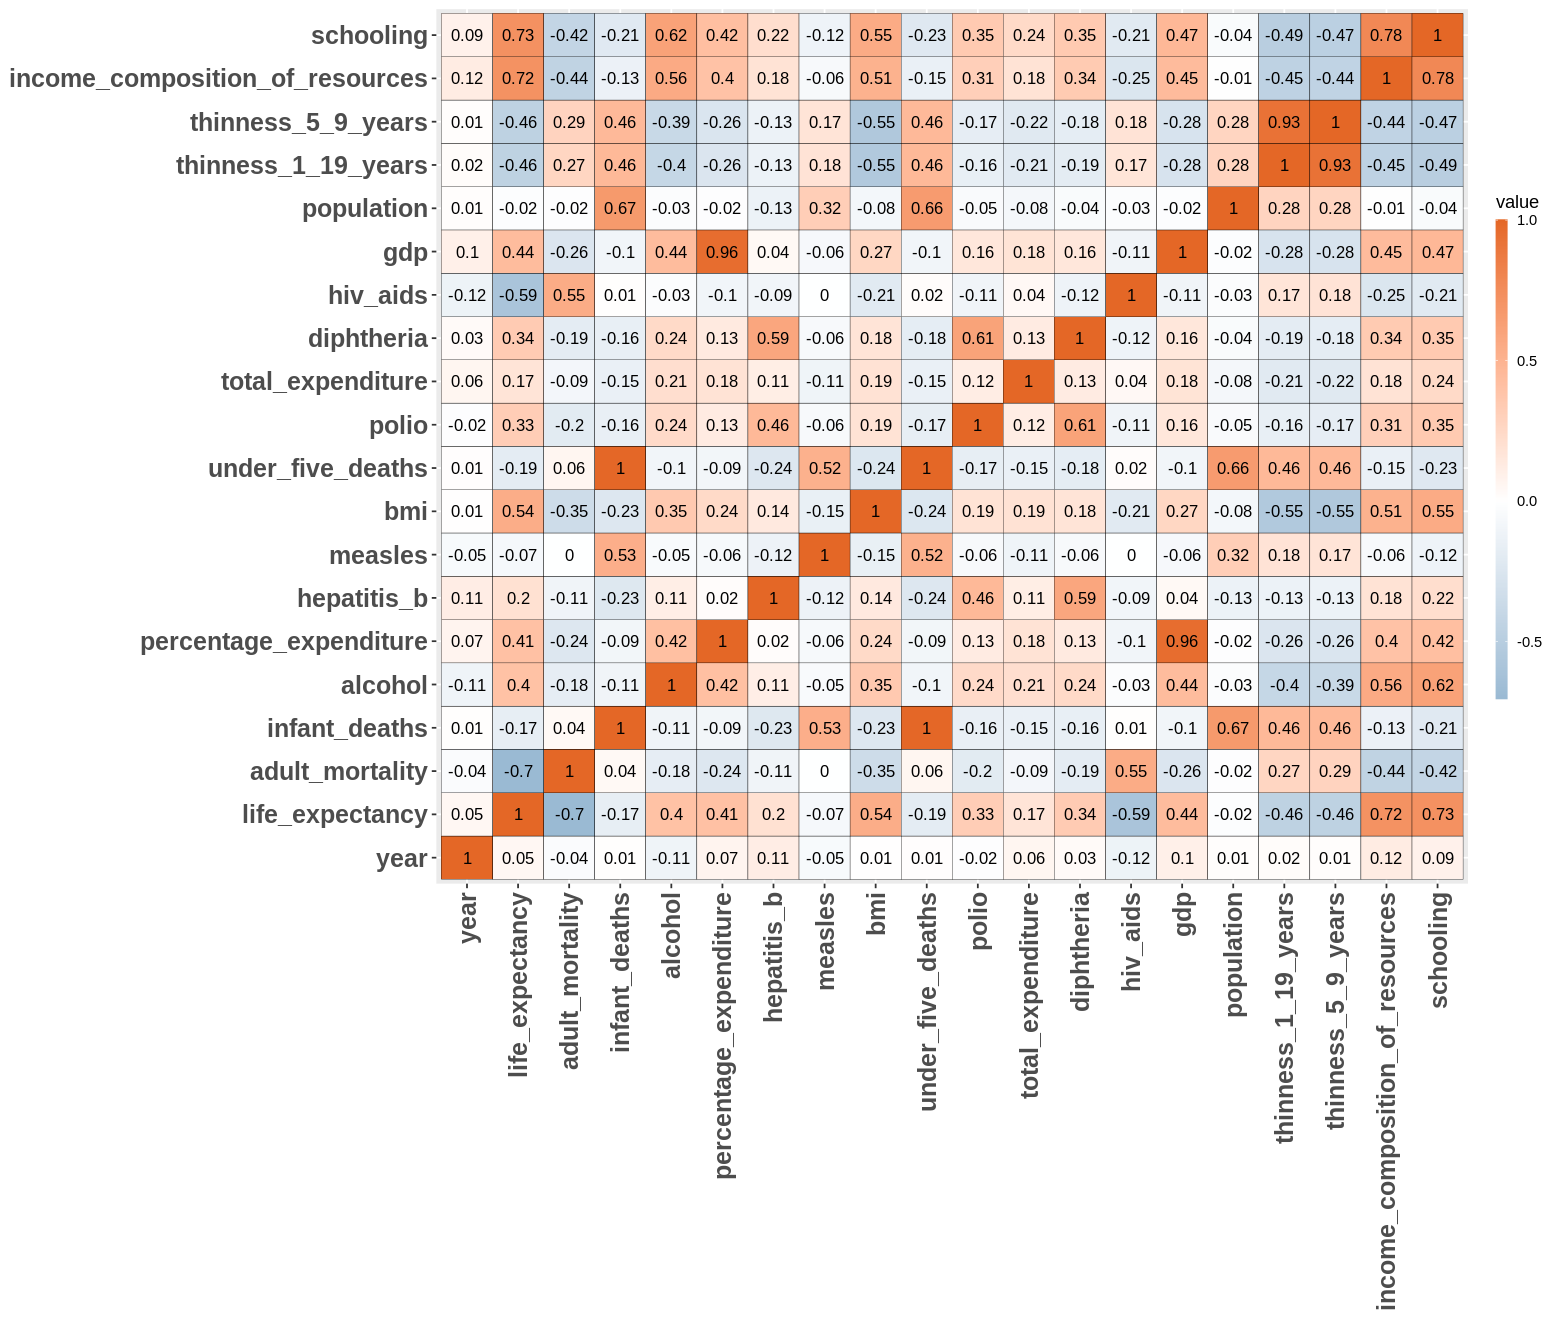

In [43]:
# correlation between numeric variables
cor_matrix <- cor(subset(le, select = -c(country, status) ))
melted <- melt(cor_matrix)

# Make plots larger 
options(repr.plot.width=13, repr.plot.height=11)

ggplot(melted) +
    geom_tile(aes(X1, X2, fill=value), colour = "black") + 
    geom_text(aes(X1, X2, label = round(value,2)), color = "black", size = 3.5) +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1), 
          axis.text=element_text(size=15, face="bold"), 
          axis.title=element_blank()) +
    scale_fill_gradient2(low = "#6D9EC1", high = "#E46726")+
    guides(fill = guide_colourbar(barwidth = 0.5, barheight = 20))
# TODO: change pallete to look prettier https://r-graph-gallery.com/79-levelplot-with-ggplot2.html

### 2.3 Exploratory Data Analysis: Visualizations

First, we will start with exploring the distribution of life expectancy using a histogram. We can see from the graph below, the distribution is unimodel but not normal and it is slightly left-skewed. The mean year of life expectancy is slgihtly below 70, but there are above 200 people has life expectancy of 73 to 74 years. The graph below gives us a general view of the distribution of our response variable. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



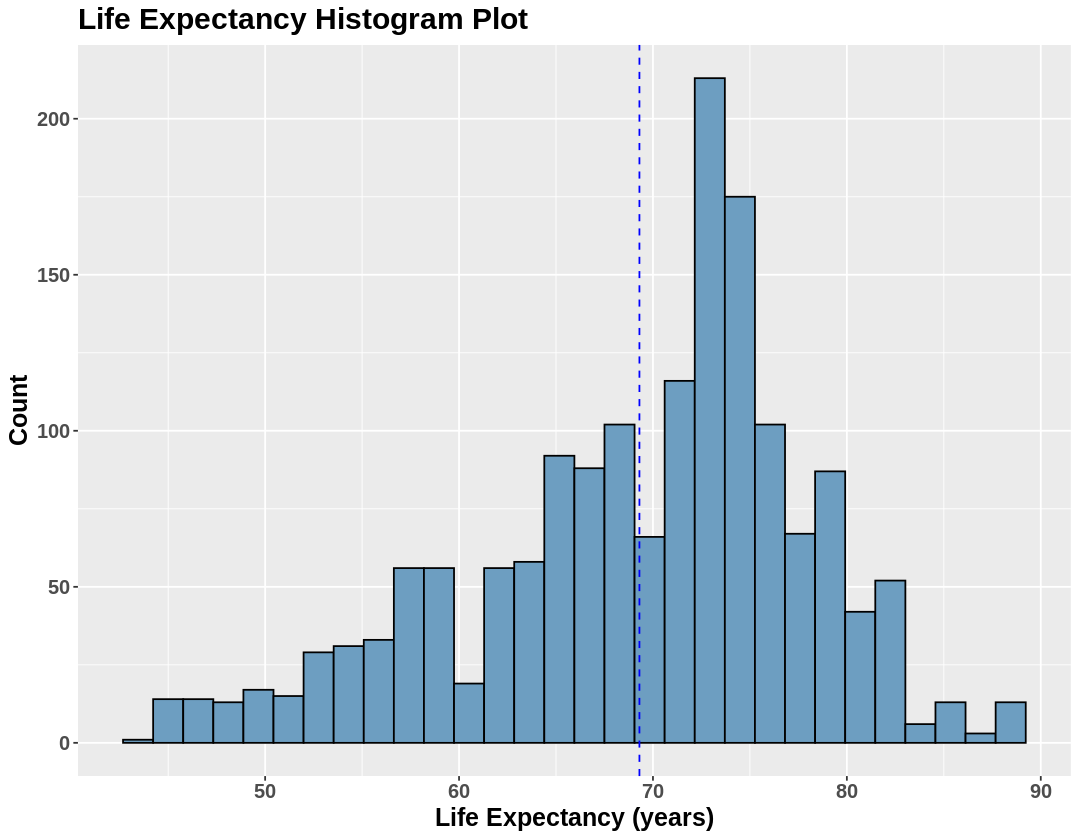

In [55]:
options(repr.plot.width=9, repr.plot.height=7)
le %>% ggplot(aes(x = life_expectancy)) + 
    geom_histogram(alpha = 2,color = "black", fill = "#6d9ec1") +
    geom_vline(aes(xintercept=mean(life_expectancy)), color="blue",
             linetype="dashed")+
    labs(title="Life Expectancy Histogram Plot",x="Life Expectancy (years)", y = "Count")+
    theme(text=element_text(size=15, face = "bold"))

Also using a Q-Q plot to check if this data set is a normal distribution, which is one of the assumptions for doing linear regression. The graph below shows that our data set is not very normally distributed, it is a bit heavy tailed. 

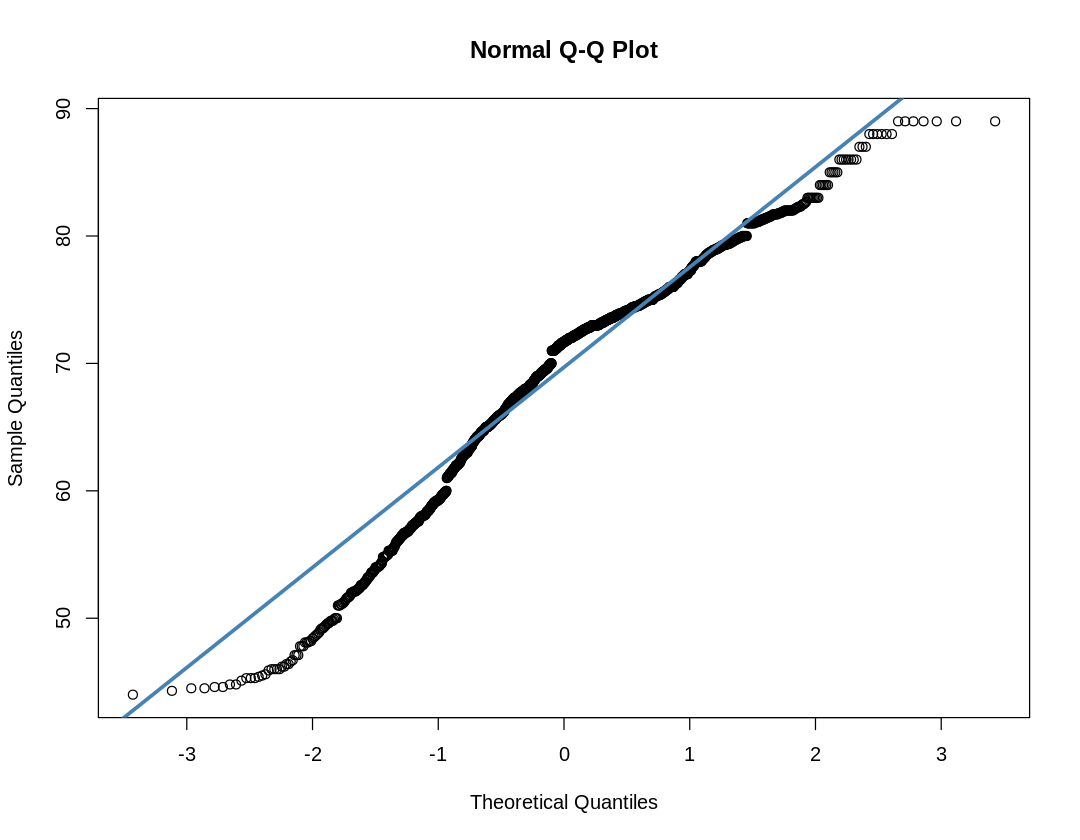

In [62]:
qqnorm(le$life_expectancy)
qqline(le$life_expectancy, col = "steelblue", lwd = 3)

Then we are exploring the relationship between Life Expectancy over the years from 2000 to 2015 according to country's developing status. From the graph below, the two lines of mean for both status showing an increasing trend, which means people have higher life expectancy on average in 2015 than 2000. We can also see a clear difference between developing countries and developed countires points, most of the data points are above 70 for developed country, while developing coutries' data points are mostly below 80. So considering this difference, we might need to include interaction terms in later analysis. 

`geom_smooth()` using formula 'y ~ x'



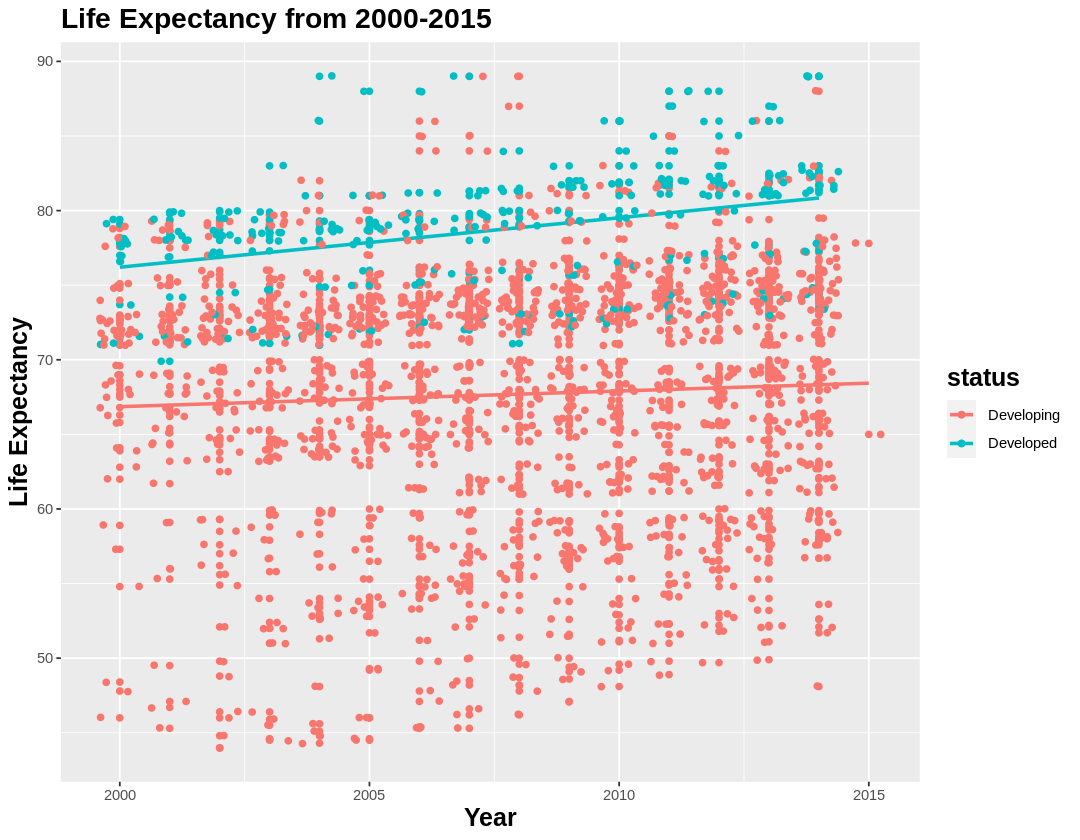

In [36]:
options(repr.plot.width=9, repr.plot.height=7)
le %>% ggplot(mapping=aes(year,life_expectancy, color=status)) + 
    geom_point() + 
    geom_smooth(method="lm",se=FALSE) + 
    theme(plot.title=element_text(size=17, face = "bold"), 
        axis.title=element_text(size=15, face="bold"), 
        legend.title = element_text(size = 15, face = "bold")) + 
    labs(title="Life Expectancy from 2000-2015", x = "Year", y = "Life Expectancy") + 
    geom_jitter()

`geom_smooth()` using formula 'y ~ x'



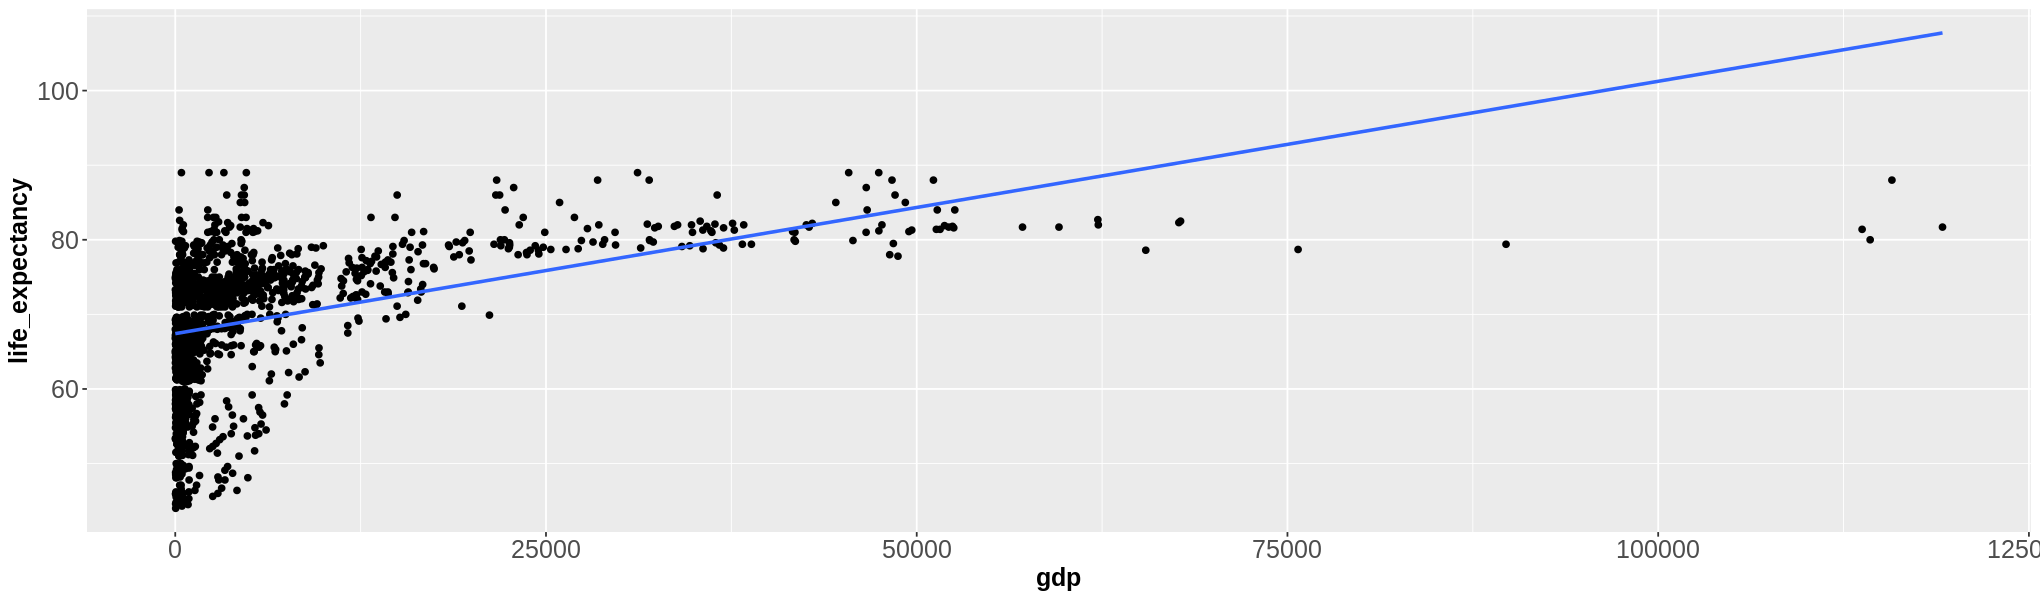

In [26]:
options(repr.plot.width=17, repr.plot.height=5)
le %>% ggplot(mapping = aes(gdp, life_expectancy)) + 
    geom_point() + 
    geom_smooth(method="lm", se = FALSE) + # https://rdrr.io/r/stats/loess.html
    theme(axis.text=element_text(size=15), 
    axis.title=element_text(size=15, face="bold"))
# TODO: change axis title to be more readable
# TODO: explain the graph

In [ ]:
options(repr.plot.width=17, repr.plot.height=7)
le %>% ggplot(mapping = aes(adult_mortality, life_expectancy)) + 
    geom_point() + 
    geom_smooth(method="lm", se = FALSE) + # https://rdrr.io/r/stats/loess.html
    theme(axis.text=element_text(size=15), 
    axis.title=element_text(size=15, face="bold"))
# TODO: change axis title to be more readable
# TODO: explain the graph
# TODO: why the data scattered apart? 

`geom_smooth()` using formula 'y ~ x'



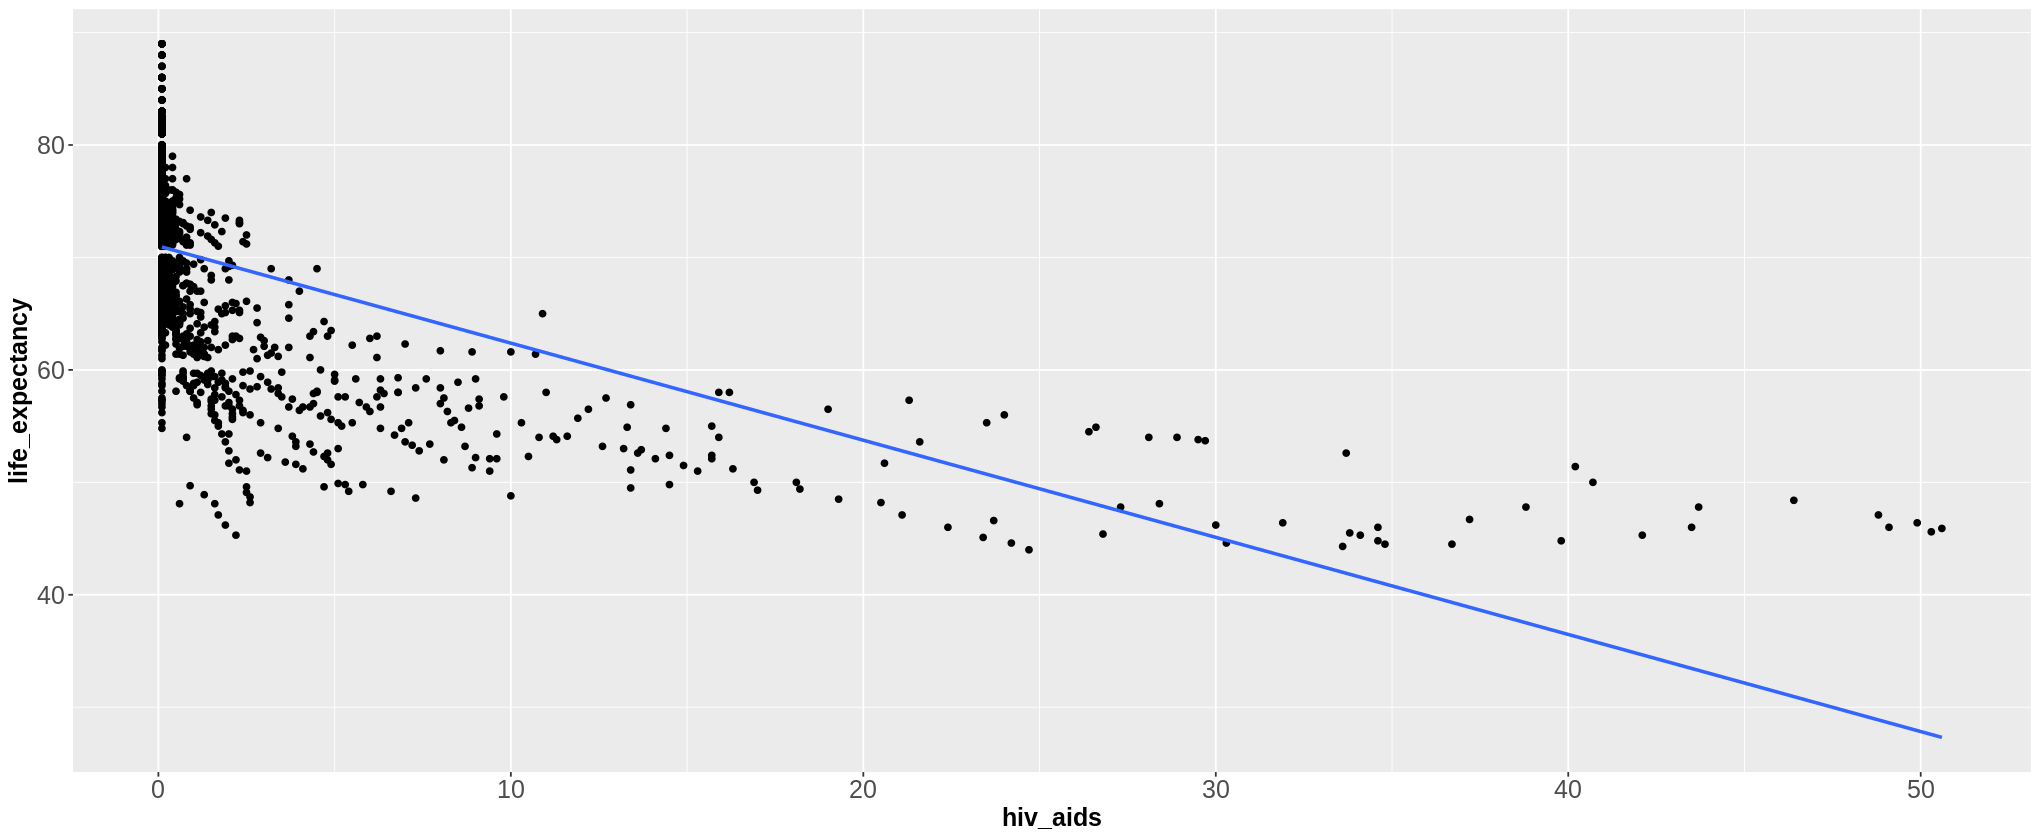

In [63]:
options(repr.plot.width=17, repr.plot.height=7)
le %>% ggplot(mapping=aes(hiv_aids,life_expectancy)) + 
    geom_point() + 
    geom_smooth(method="lm", se = FALSE) + # https://rdrr.io/r/stats/loess.html
    theme(axis.text=element_text(size=15), 
    axis.title=element_text(size=15, face="bold"))
# TODO: change axis title to be more readable
# TODO: explain the graph

`geom_smooth()` using formula 'y ~ x'



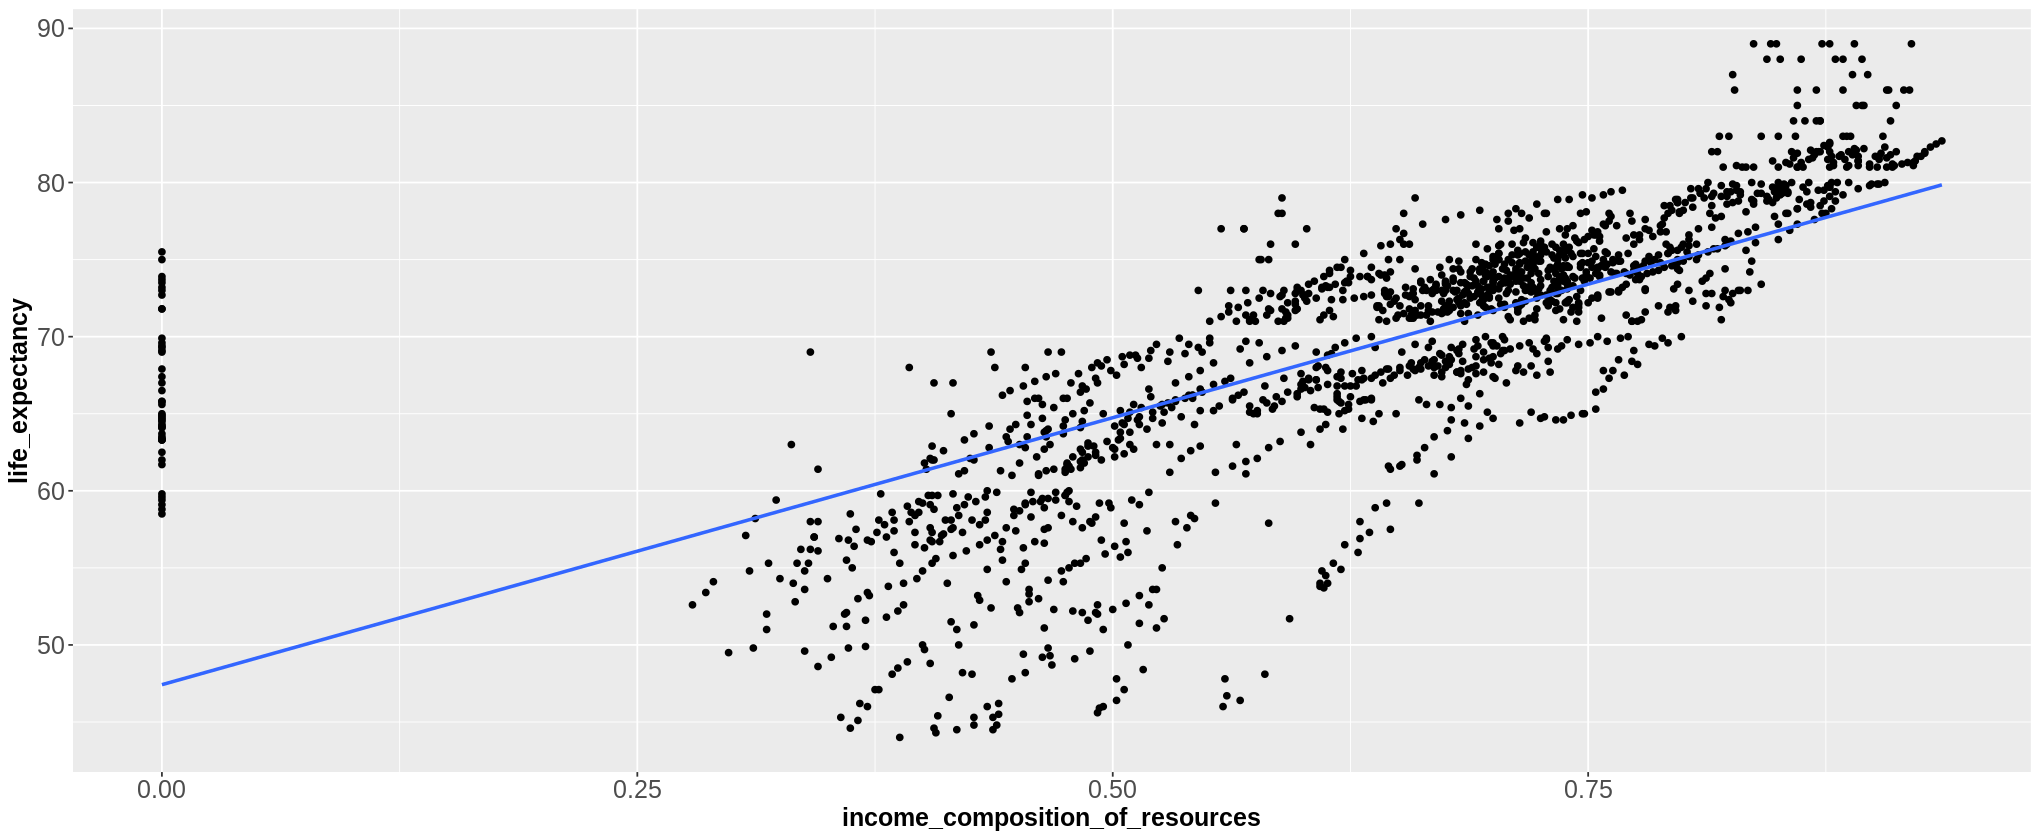

In [64]:
options(repr.plot.width=17, repr.plot.height=7)
le %>% ggplot(mapping=aes(income_composition_of_resources,life_expectancy)) + 
    geom_point() + 
    geom_smooth(method="lm", se = FALSE) + # https://rdrr.io/r/stats/loess.html
    theme(axis.text=element_text(size=15), 
    axis.title=element_text(size=15, face="bold")) 
# TODO: change axis title to be more readable
# TODO: explain the graph

`geom_smooth()` using formula 'y ~ x'



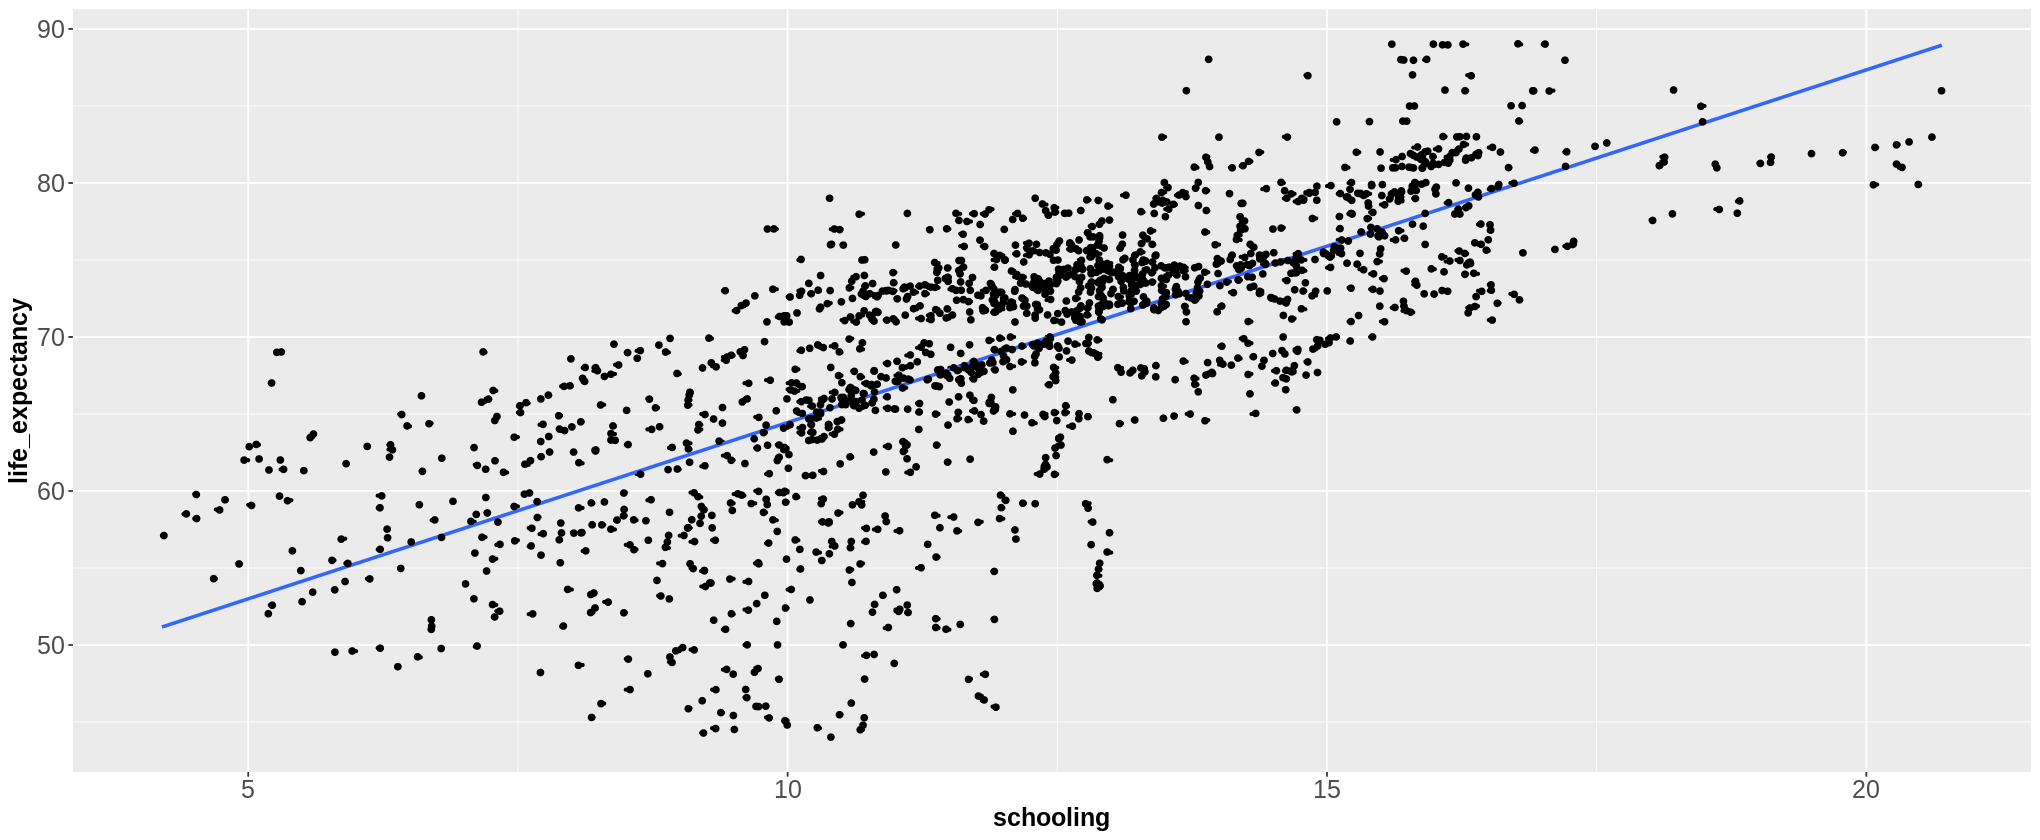

In [69]:
options(repr.plot.width=17, repr.plot.height=7)
le %>% ggplot(mapping=aes(schooling,life_expectancy)) + 
    geom_point(size = 0.5) + 
    geom_smooth(method="lm", se = FALSE) + # https://rdrr.io/r/stats/loess.html
    theme(axis.text=element_text(size=15), 
    axis.title=element_text(size=15, face="bold")) + 
    geom_jitter()
# TODO: change axis title to be more readable
# TODO: explain the graph

`geom_smooth()` using formula 'y ~ x'



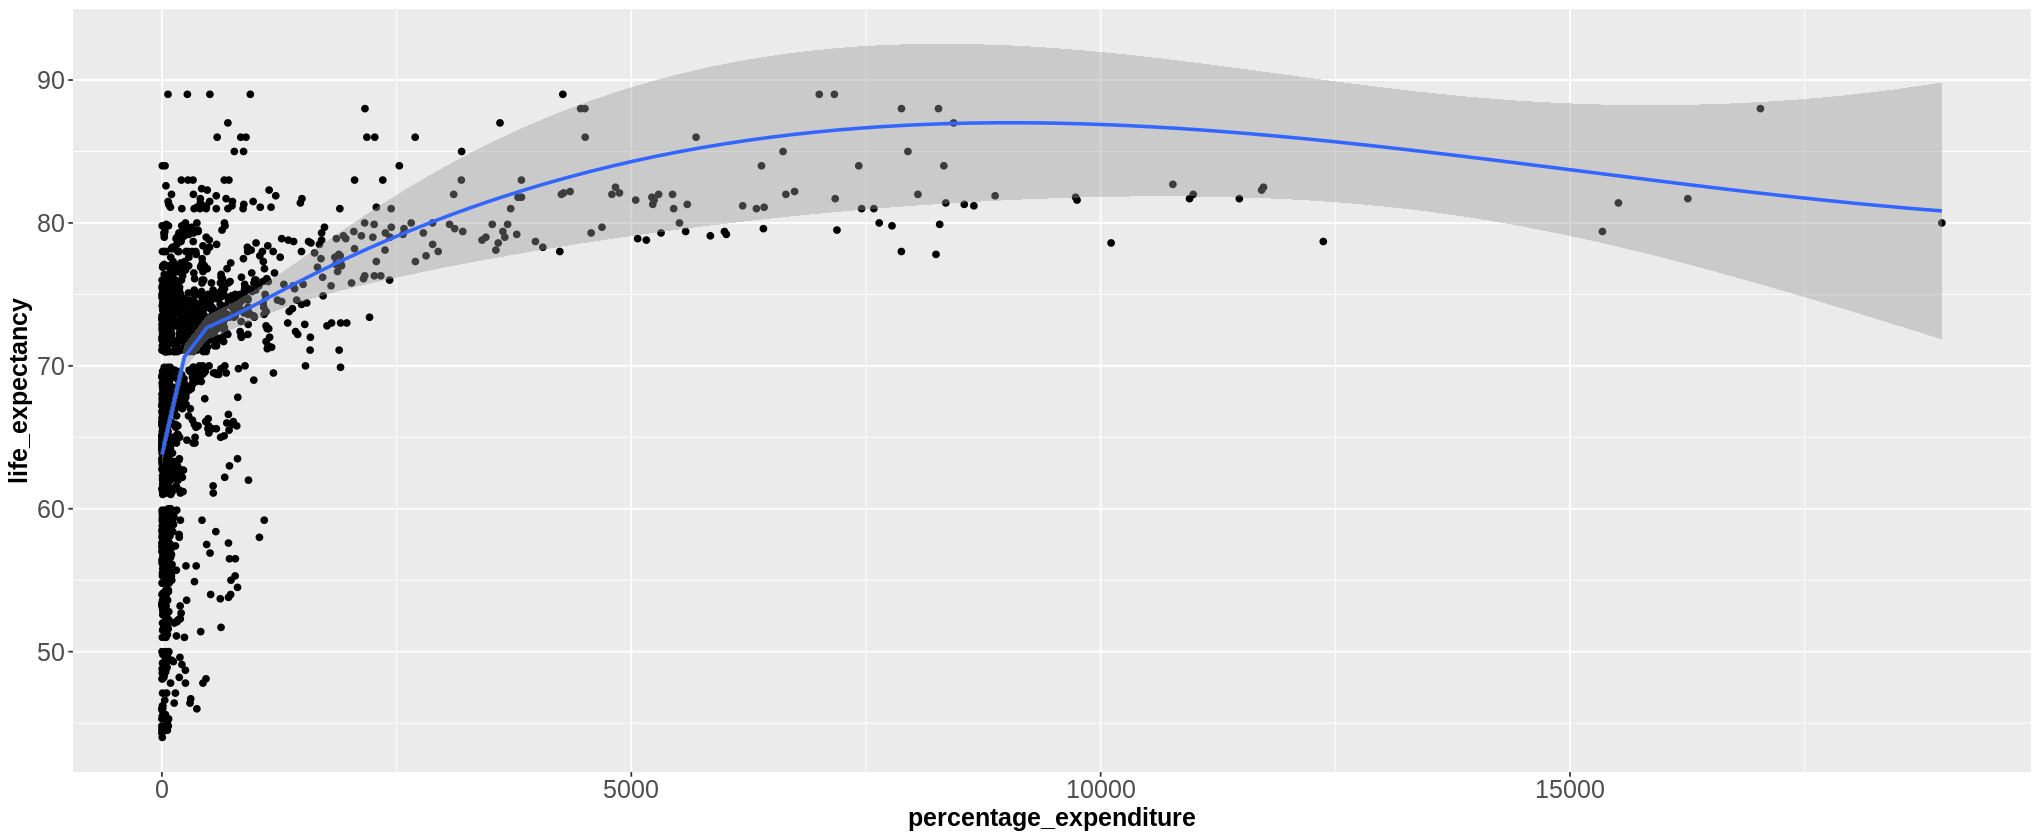

In [66]:
options(repr.plot.width=17, repr.plot.height=7)
le %>% ggplot(mapping = aes(percentage_expenditure, life_expectancy)) + 
    geom_point() + 
    geom_smooth(method="lm", se = FALSE) + # https://rdrr.io/r/stats/loess.html
    theme(axis.text=element_text(size=15), 
    axis.title=element_text(size=15, face="bold"))
# TODO: change axis title to be more readable
# TODO: explain the graph
# TODO: why the data scattered apart? 

`geom_smooth()` using formula 'y ~ x'



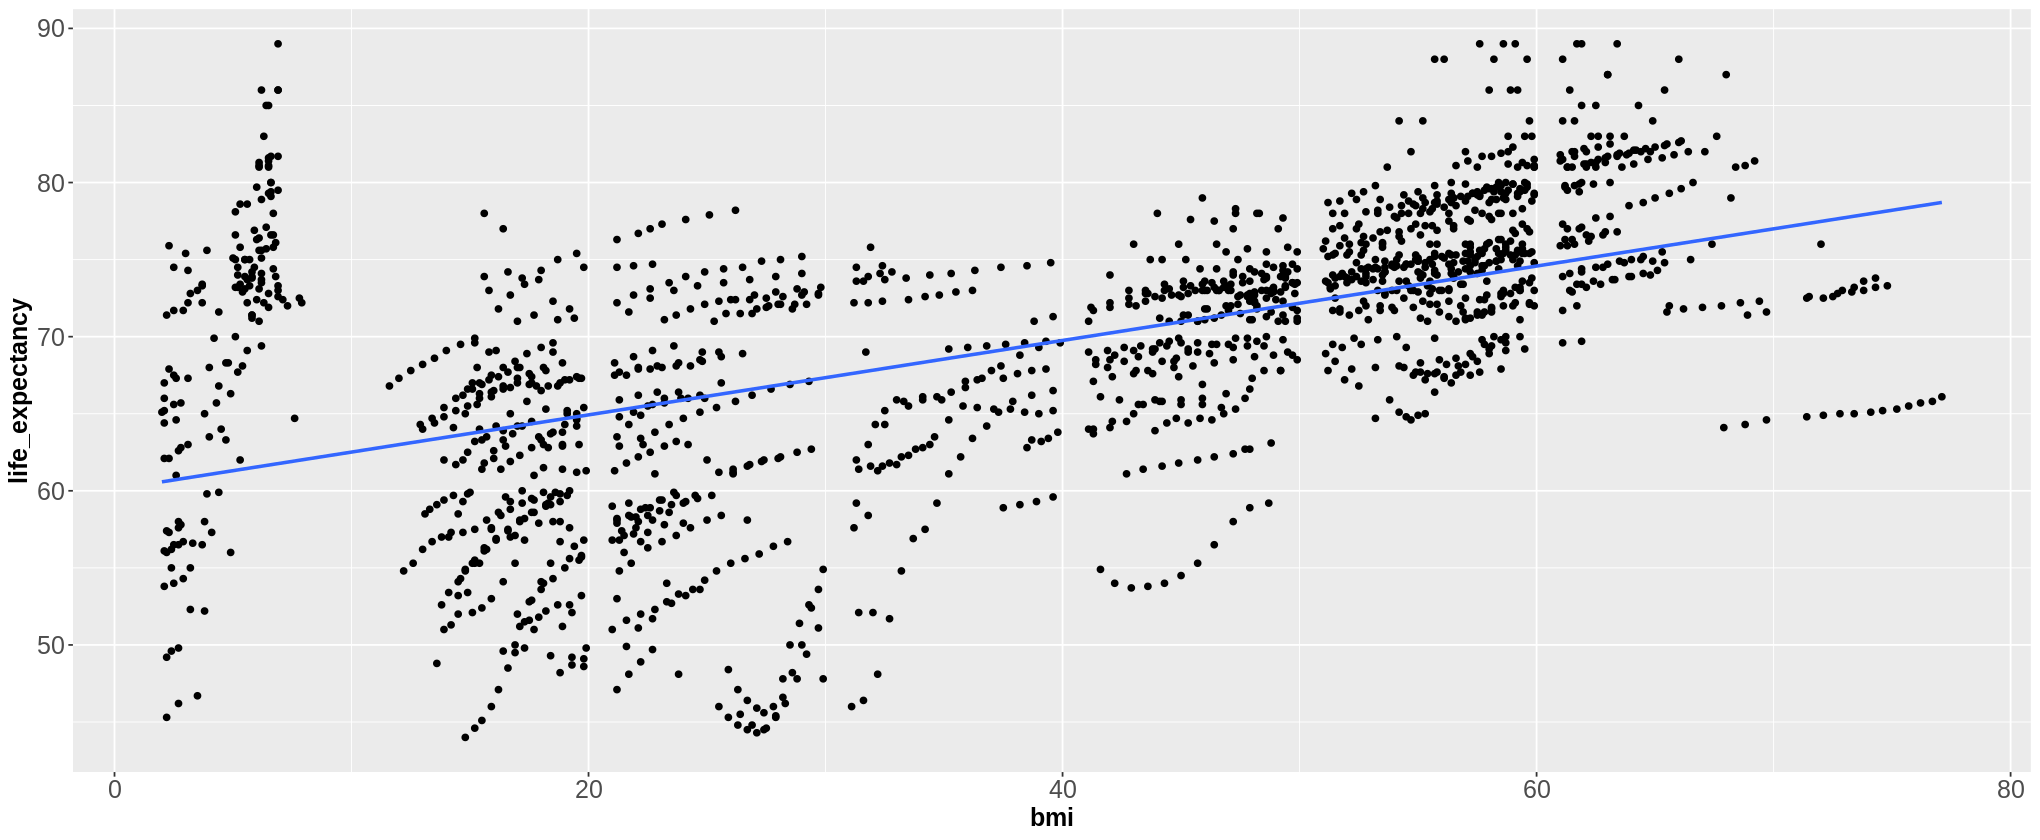

In [68]:
options(repr.plot.width=17, repr.plot.height=7)
le %>% ggplot(mapping=aes(bmi,life_expectancy)) + 
    geom_point() + 
    geom_smooth(method="lm", se = FALSE) + # https://rdrr.io/r/stats/loess.html
    theme(axis.text=element_text(size=15), 
    axis.title=element_text(size=15, face="bold")) 
# TODO: change axis title to be more readable
# TODO: explain the graph

TODO: select a couple of plots and to explain

TODO: reason that we should exclude `country` in the model

## 3. Methods

- What methods do you plan on using?

We will perform EDA to detect heteroscedasticity and remove multicollinearity. Afterwards, we will split the model into the training set and the testing set with a 75-25 split.

Using the training set, we will perform a forward predictive modelling to and select our model depending on the model with the best Mallow's Cp/ BIC value. Using the same training set, we will create a linear model using the selected input variables in an additive model.

Finally, we will evaluate the performance of the linear model using the testing set. 

- What do you expect to achieve?

Through our analysis, we expect to see a strong relationship between the selected input variables that predict one’s life expectancy the best. We will be judging the relationship, as well as how good our model is, by the test RMSE that we obtain.

- What impact could your results have?

We hope that our results can be used by life insurance companies to fine tune their existing models, and help them better adjust the price of insurance plans depending on one’s expected life expectancy.



## 4. References


1. Passarino, Giuseppe, et al. “Human Longevity: Genetics or Lifestyle? It Takes Two to Tango.” Immunity &amp; Ageing : I &amp; A, BioMed Central, 5 Apr. 2016, https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4822264/.
2. “Social Security.” Actuarial Life Table, https://www.ssa.gov/oact/STATS/table4c6.html. 
3. KumarRajarshi. “Life Expectancy (WHO).” Kaggle, 10 Feb. 2018, https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who. 
4. Tiffany Timbers, Trevor Campbell. “Data Science.” Data Science, 24 Sept. 2022, https://datasciencebook.ca/. 
